# CREATE DEEP NEURAL NETWORK

In [25]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from os.path import join
from os import listdir
from shutil import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GLOBAL VARIABLES
preprocessingPath="secondStep_preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 8
epochs = 128
lr = 1e-4
input_shape = (224,224)
channels = (1,)
class_mode = 'categorical'
color_mode = 'grayscale'
num_class = len(classes)

## Mount files to data generators

In [3]:
# ## SEPARATING TO TRAIN AND VALIDATION SETS
# for c in classes:
#     classPath = join(preprocessingPath,c)
#     images = listdir(classPath)
#     np.random.shuffle(images)
#     numImages = len(images)
#     setClassPath = join(trainPath,c)
#     for n,image in enumerate(images):
#         if n == round(numImages*train): 
#             setClassPath = join(valPath,c)
#         imagePath = join(classPath,image)
#         newImagePath = join(setClassPath,image)
#         copy(imagePath, newImagePath)

In [4]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #  width_shift_range = 0.2,
                                    #  height_shift_range = 0.2, 
                                    #  zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                    #  rotation_range = 30,
                                     ).flow_from_directory(directory = trainPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

Found 881 images belonging to 4 classes.


Found 220 images belonging to 4 classes.


## CREATE MODEL

In [13]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2048, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_class, activation='softmax'))



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              51381248  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_5 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 53,488,644
Trainable params: 53,488,644
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['acc'])

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=4, min_lr=1e-7)
es = EarlyStopping(monitor='loss', patience=7)

history = model.fit(train_generator, validation_data = val_generator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/128
111/111 [==============================] - 3s 22ms/step - loss: 1.7854 - acc: 0.2701 - val_loss: 1.3741 - val_acc: 0.3727 - lr: 1.0000e-04
Epoch 2/128
111/111 [==============================] - 2s 21ms/step - loss: 1.4052 - acc: 0.3076 - val_loss: 1.3285 - val_acc: 0.3727 - lr: 1.0000e-04
Epoch 3/128
111/111 [==============================] - 2s 21ms/step - loss: 1.3508 - acc: 0.3292 - val_loss: 1.3941 - val_acc: 0.2864 - lr: 1.0000e-04
Epoch 4/128
111/111 [==============================] - 2s 21ms/step - loss: 1.3380 - acc: 0.3451 - val_loss: 1.3063 - val_acc: 0.3636 - lr: 1.0000e-04
Epoch 5/128
111/111 [==============================] - 2s 21ms/step - loss: 1.3288 - acc: 0.3530 - val_loss: 1.2931 - val_acc: 0.3727 - lr: 1.0000e-04
Epoch 6/128
111/111 [==============================] - 3s 23ms/step - loss: 1.3407 - acc: 0.3462 - val_loss: 1.3059 - val_acc: 0.3773 - lr: 1.0000e-04
Epoch 7/128
111/111 [==============================] - 2s 22ms/step - loss: 1.3253 - acc: 0.33

## PLOT RESULTS

In [17]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Train Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  25
Final Train Loss: 1.2579
Final Validation Loss: 1.2588
Final Train Accuracy: 0.4098
Final Test Accuracy: 0.4636


In [28]:
import warnings
warnings.filterwarnings("ignore")

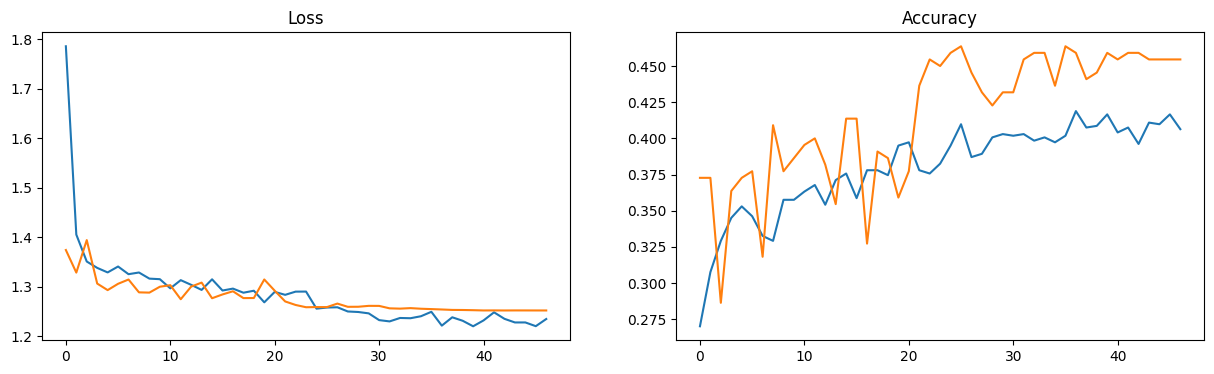

In [37]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.lineplot(train_loss , ax=ax[0], )
sns.lineplot(val_loss, ax=ax[0], )
# ax[0].legend(labels=['train loss','validation loss'],loc="upper right")
ax[0].set_title('Loss')

sns.lineplot(train_acc, ax=ax[1], )
sns.lineplot(val_acc, ax=ax[1], )
# ax[1].legend(labels=['train acc','validation acc'],loc="upper right")
ax[1].set_title('Accuracy')

plt.show()
